In [1]:
 #!pip install matplotlib scipy numpy qutip cupy-cuda11x

In [2]:
# import os
# os.add_dll_directory(r"C:\Users\tahab\anaconda3\DLLs")

import numpy as np
from matplotlib import pyplot as plt
import cupy as cp

from Kite_class import (Kite_Transmon_Erwan, Kite_Transmon_Taha , Kite_transmon_CoupledToResonator)
 

In [3]:
# Initial guess for the qubit parameters.
params = {'E_C': 1.64/50, # The charging energy of the shunting cap
        'E_L': 2.14, # The inductive energy of the branch inductance
        'E_J': 21.43, # The Josephson energy of a JJ
        'E_CJ': 7.14, # The charging energy of a JJ
        'eps_l' : 0., # Asymmetry in inductive energy between L of each branch
        'eps_j' : 0., # Asymmetry in Josephson energy between JJ of each branch
        'eps_c' : 0., # Asymmetry in charging energy between JJ of each branch
        'phi_ext': 0.5, # External flux threading the loop
        'n_g' : 0., # Offset charge in the island
        'num_qbt_0': 40,
        'num_qbt_1': 40,
        'num_qbt_2': 40,
        'num_osc': 40, # number of modes of the Kite in the eigenbasis
        'f_r': 4.7, # resonator frequency
        'g_r_J': .200, # Coupling to resonator
        'num_res': 20,
        'num_tot': 20, # number of modes of the coupled system
        'error_type': 'relative_error',
        'data_set': 'data3'
        }

In [10]:
phi_ext = np.linspace(0.4,.6,20)
n_g = np.array([0.])

levels = np.zeros((phi_ext.size, n_g.size, params['num_tot']))
levels_qubit = np.zeros((phi_ext.size, n_g.size, params['num_osc']))

# weights = np.zeros((phi_ext.size, n_g.size, params['num_tot'], params['num_osc']))

for idx_phi_ext, value_phi in enumerate(phi_ext):
    for idx_n_g, value_ng in enumerate(n_g):
        print(idx_phi_ext, value_phi)
        params['phi_ext'] = value_phi
        params['n_g']  = value_ng
        qubit = Kite_Transmon_Taha(params)
        levels_qubit[idx_phi_ext,idx_n_g,:] = qubit.levels().get()
#        cp.get_default_memory_pool().free_all_blocks()
        system = Kite_transmon_CoupledToResonator(qubit, params)
        levels[idx_phi_ext,idx_n_g,:] = system.levels().get()

params['levels'] = levels
params['levels_qubit'] = levels_qubit

0 0.4
elapsed time H: 2.19 s
elapsed time diag: 23.55 s


ValueError: too many values to unpack (expected 2)

/tmp/ipykernel_1580/1553701000.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


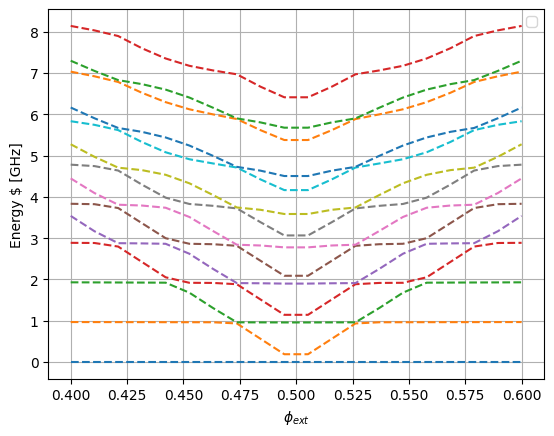

In [7]:
plt.figure()

ng_idx = 0
#E0 = params['levels'][:,ng_idx,0]
#n_lvl_max=14
#for i in range(n_lvl_max):
#    plt.plot(phi_ext, (params['levels'][:,ng_idx,i] - E0))

E0_qbt = params['levels_qubit'][:,ng_idx,0]
n_lvl_max=14
for i in range(n_lvl_max):
    plt.plot(phi_ext, (params['levels_qubit'][:,ng_idx,i] - E0_qbt), linestyle='--')

plt.xlabel('$\phi_{ext}$')
plt.ylabel('Energy $ [GHz]')
plt.grid()
plt.legend()
plt.show()

/tmp/ipykernel_1580/587809859.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


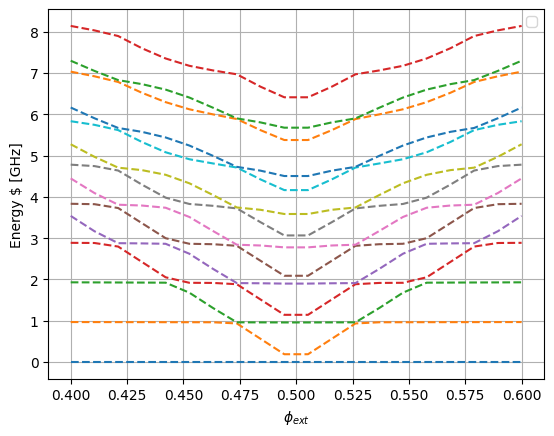

In [6]:
plt.figure()

ng_idx = 0

E0_qbt = params['levels_qubit'][:,ng_idx,0]
n_lvl_max=14
for i in range(n_lvl_max):
    plt.plot(phi_ext, (params['levels_qubit'][:,ng_idx,i] - E0_qbt), linestyle='--')

plt.xlabel('$\phi_{ext}$')
plt.ylabel('Energy $ [GHz]')
plt.grid()
plt.legend()
plt.show()